# UMAP
- Iris vs TSNE
- MNIST vs TSNE
- Parameter selection on generated data 
- Comparison to other dimensionality reduction algorithms
- Word Vectors from NIPS conference paper abstracts

Installation: https://umap-learn.readthedocs.io/en/latest/index.html

IRIS and MNIST sections follow: https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [69]:

import umap
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import time
from sklearn import datasets, decomposition, manifold, preprocessing
from colorsys import hsv_to_rgb
import re
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
from gensim.models import word2vec
%matplotlib inline


#Load iris and digits datasets
from sklearn.datasets import load_iris, load_digits


import warnings
warnings.filterwarnings('ignore') # action='once'


In [70]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(12,8)})

### Iris dataset

In [5]:
iris = load_iris()

#4 dimensions - sepal length, sepal width, petal length, petal width 
#see it as 2d scatterplots

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))


In [24]:
#UMAP follows sklearn API
reducer = umap.UMAP()

%time umap_iris = reducer.fit_transform(iris.data)
print(umap_iris.shape)
umap_iris[:5]

CPU times: user 335 ms, sys: 35.8 ms, total: 370 ms
Wall time: 345 ms
(150, 2)


array([[ 8.878182 , -3.778602 ],
       [10.777144 , -4.5306053],
       [10.74014  , -3.9289017],
       [10.774868 , -3.9556265],
       [ 9.01998  , -3.8093293]], dtype=float32)

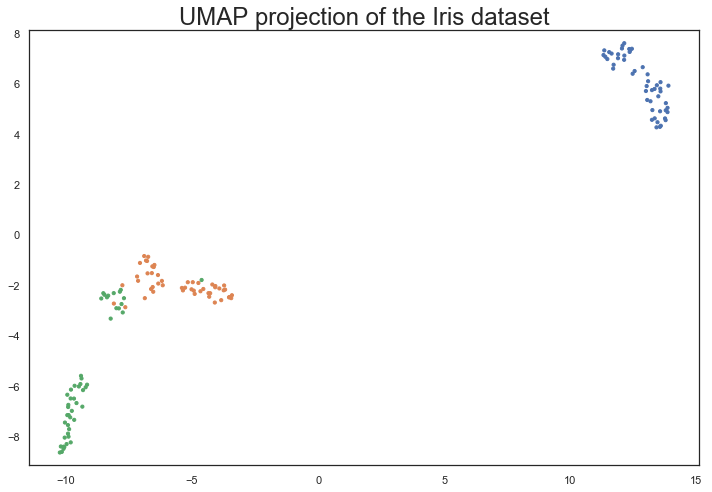

In [8]:
plt.scatter(umap_iris[:, 0], umap_iris[:, 1], c=[sns.color_palette()[x] for x in iris.target],s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

In [23]:
reducer = TSNE()

tsne_iris = reducer.fit_transform(iris.data)
print(tsne_iris.shape)
tsne_iris[:5]

%time umap_iris = reducer.fit_transform(iris.data)
print(umap_iris.shape)
print(umap_iris[:5])


(150, 2)
CPU times: user 2.97 s, sys: 336 ms, total: 3.3 s
Wall time: 3.31 s
(150, 2)
[[-19.42122    9.890934]
 [-16.871984  11.127105]
 [-16.98465    9.918852]
 [-16.546099  10.34091 ]
 [-19.469473   9.630399]]


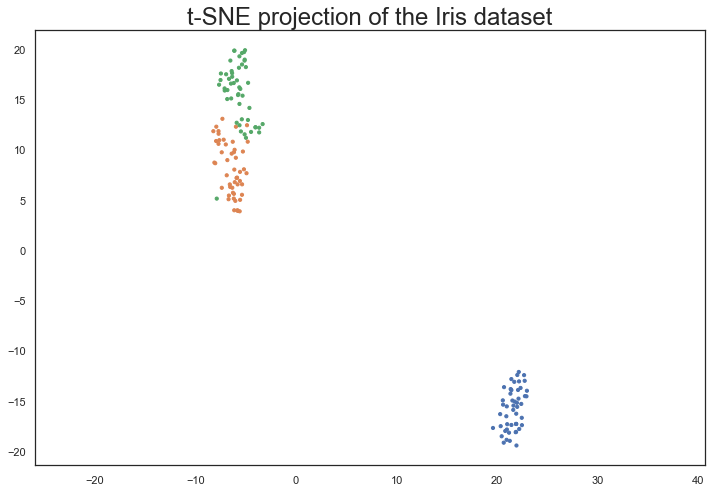

In [13]:

plt.scatter(tsne_iris[:, 0], tsne_iris[:, 1], c=[sns.color_palette()[x] for x in iris.target],s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE projection of the Iris dataset', fontsize=24);


### MNIST dataset

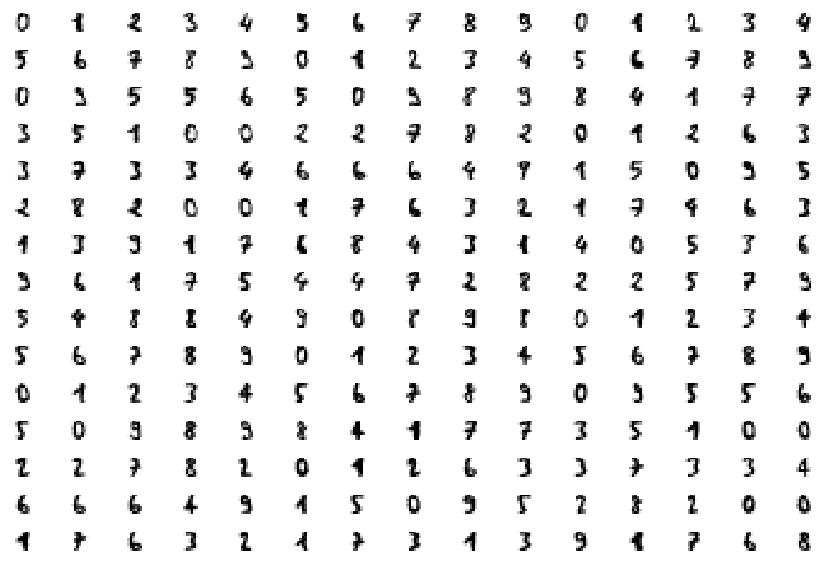

In [19]:
digits = load_digits()

#8x8 images so 64 attributes

#examples
fig, ax_array = plt.subplots(15, 15)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)


In [38]:
reducer = umap.UMAP(random_state=42)
%time reducer.fit(digits.data)

CPU times: user 4.27 s, sys: 348 ms, total: 4.62 s
Wall time: 4.45 s


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=42,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=False)

In [17]:
umap_digit = reducer.transform(digits.data)

print(umap_digit.shape)
umap_digit[:5]

(1797, 2)


array([[15.318228  ,  1.892302  ],
       [-7.0599804 ,  2.852144  ],
       [-5.364305  ,  1.1695055 ],
       [-0.96996576,  0.36345217],
       [ 6.3392377 , 10.887402  ]], dtype=float32)

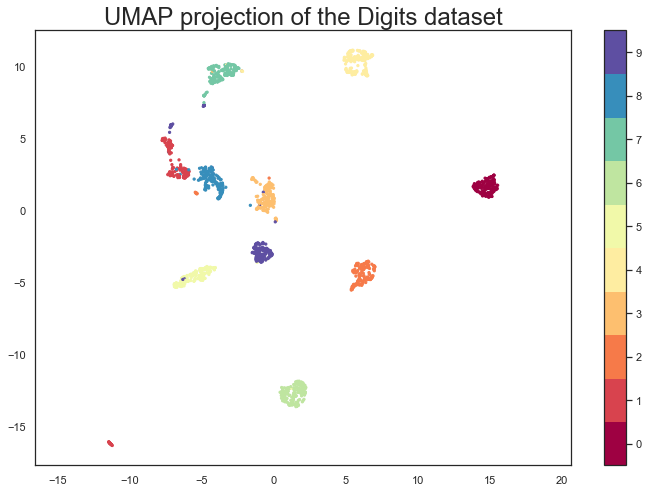

In [18]:
plt.scatter(umap_digit[:, 0], umap_digit[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [27]:
reducer = TSNE(random_state=42)
%time tsne_digit = reducer.fit_transform(digits.data)
print(tsne_digit.shape)
tsne_digit[:5]

CPU times: user 46.5 s, sys: 5.53 s, total: 52 s
Wall time: 53.1 s
(1797, 2)


array([[ 64.89154   ,  -0.91041076],
       [-23.001663  ,   0.37934512],
       [ -7.88827   ,  27.260277  ],
       [ 26.571157  ,  17.319496  ],
       [-43.865337  , -27.682026  ]], dtype=float32)

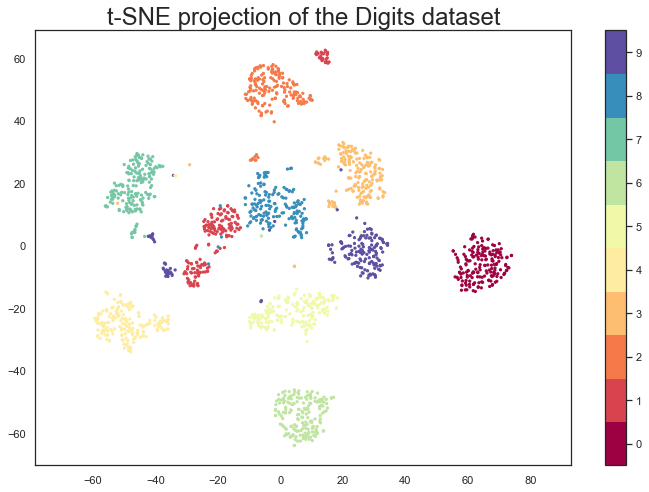

In [28]:
plt.scatter(tsne_digit[:, 0], tsne_digit[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('t-SNE projection of the Digits dataset', fontsize=24);

### Random 4D cube

The major UMAP parameters are:

* n_neighbors - determines balance of local vs global structure. It constrains the size of the local neighborhood UMAP looks at when attempting to learn manifold structure. Low values brings out local structure, large bring out larger neighborhoods while losing the fine detail.
* min_dist - determines the minimum distance apart points are allowed to be in the embedding. Low values will result in clumpier embeddings which is good for finer topological structure. Larger values is useful to visualize broad topological structure.
* n_components - how many components to return. t-SNE isn't great in more than 2 dimensions but UMAP is.
* metric - controls how the distance is computed in input data. Many metrics are built in but they can also be defined if compiled with numba.


In [66]:
#generate 4d cube 
np.random.seed(42)
data = np.random.rand(800, 4)

In [67]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

CPU times: user 1.67 s, sys: 202 ms, total: 1.88 s
Wall time: 1.88 s


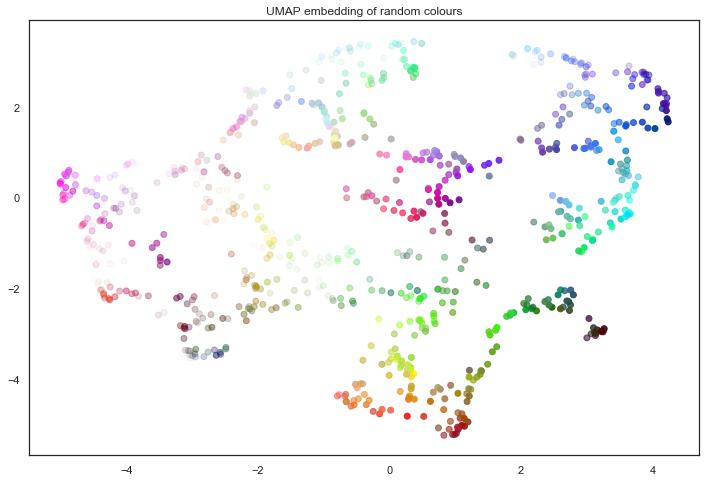

In [71]:
#colors represent the data. So data close to one another in 4d space are 
#similar colors
plt.scatter(u[:,0], u[:,1], c=data)
plt.title('UMAP embedding of random colors');

In [72]:

#function which fits, transforms and plots

def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

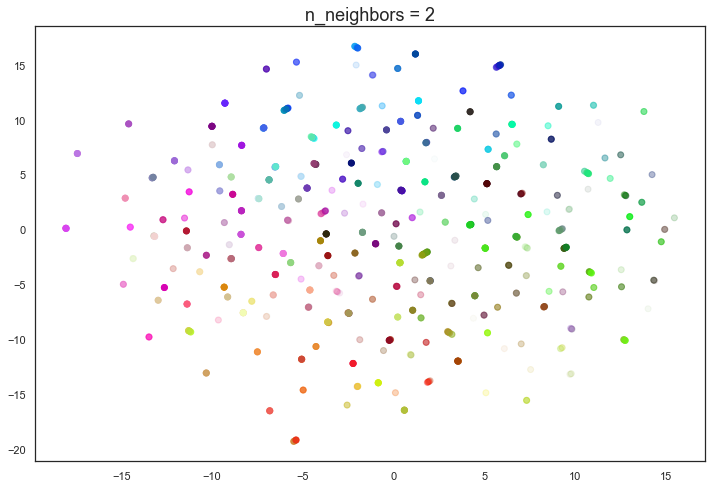

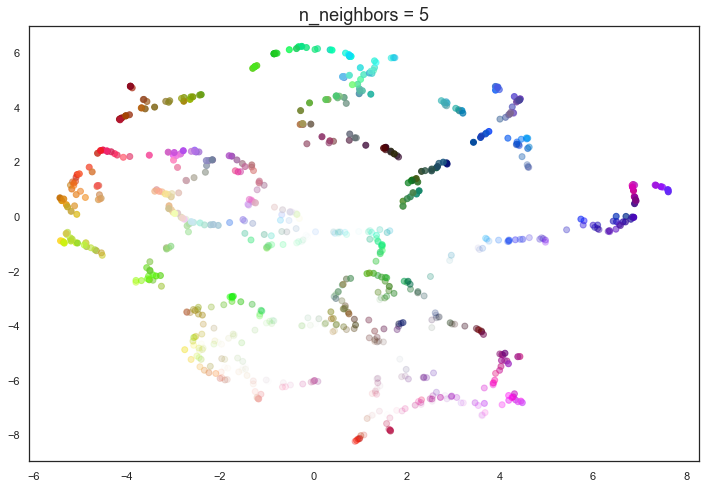

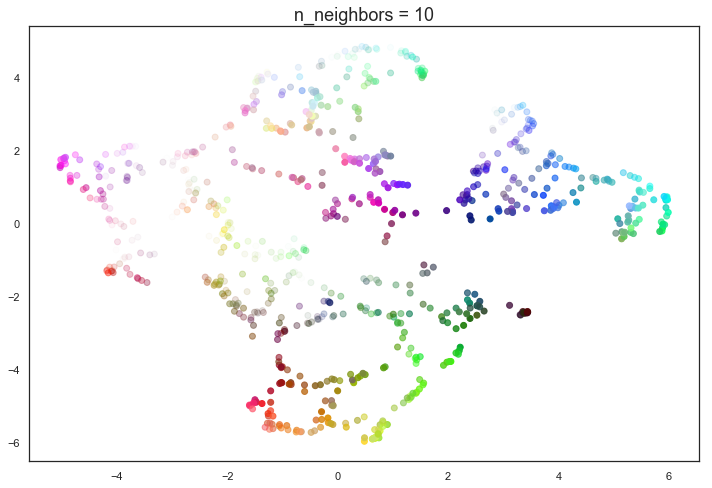

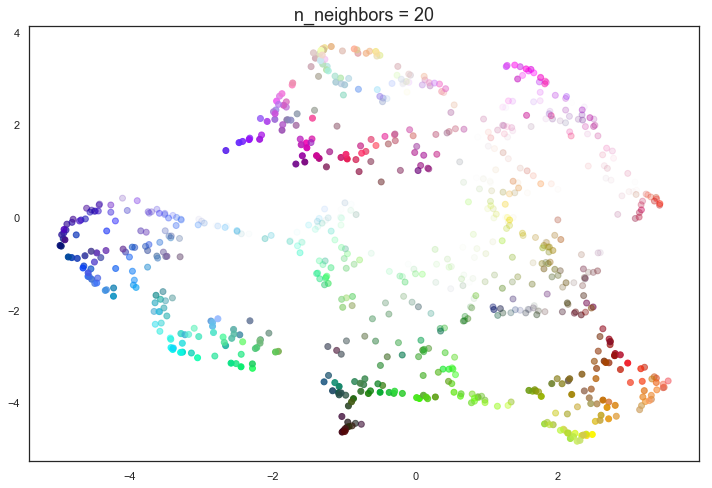

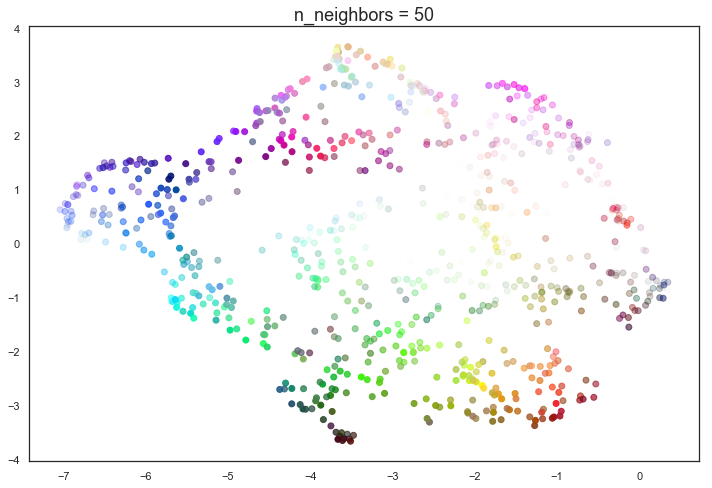

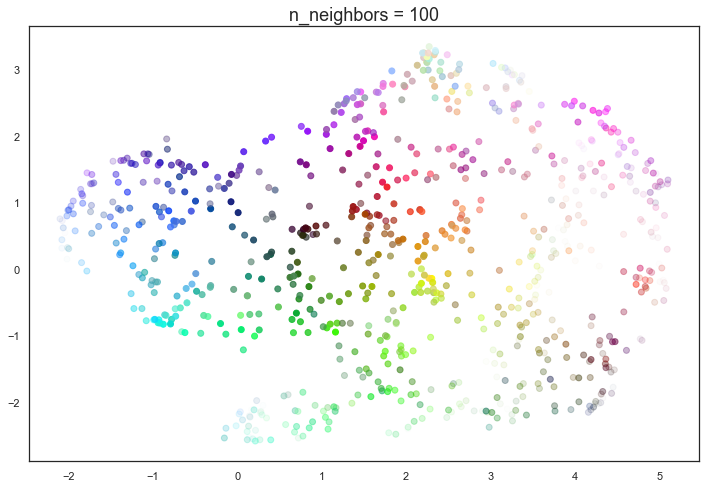

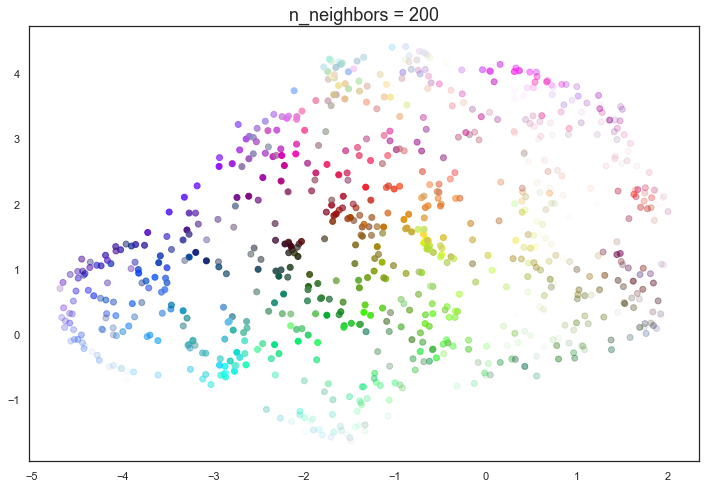

In [73]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

#can see that higher n_neighbors glues more points together

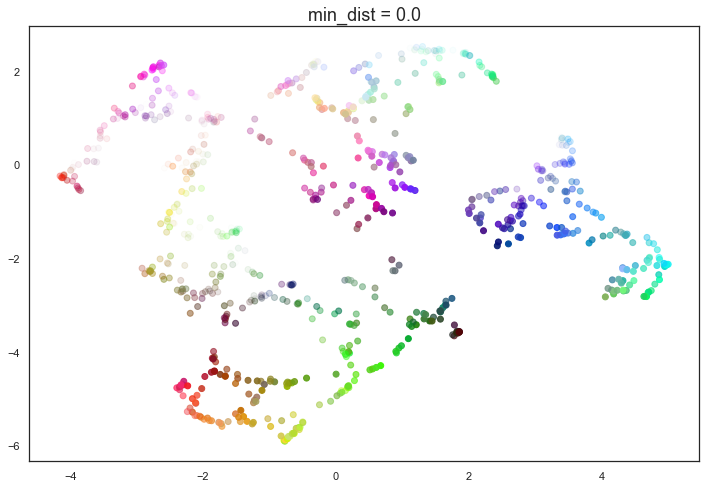

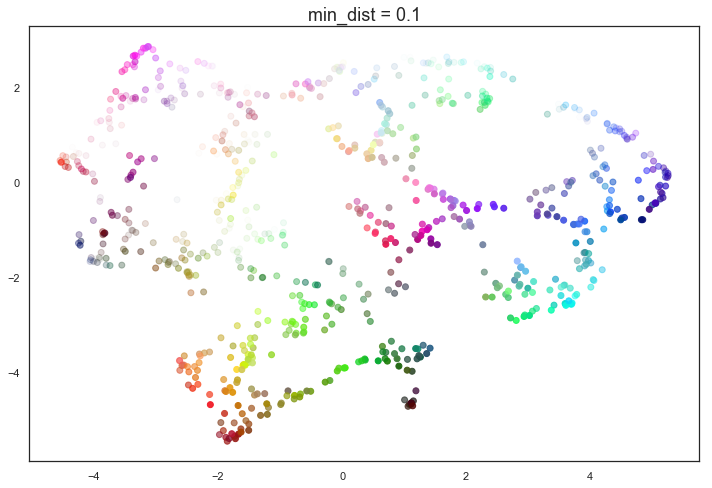

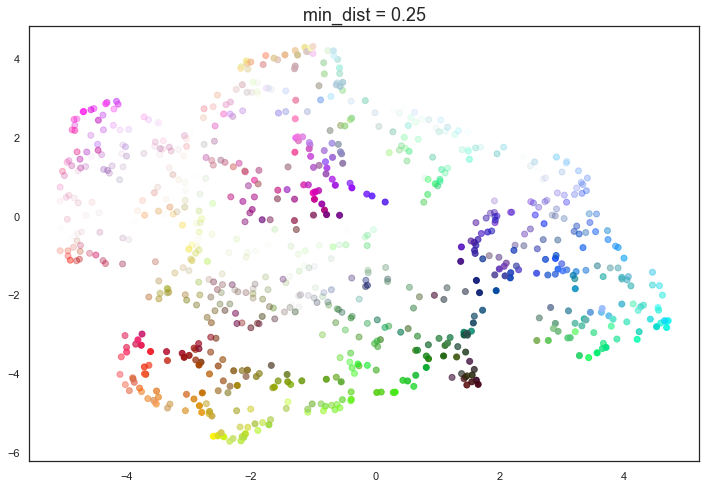

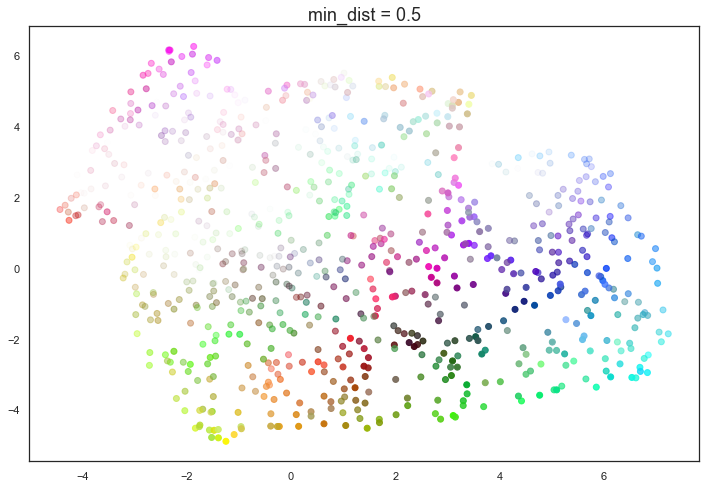

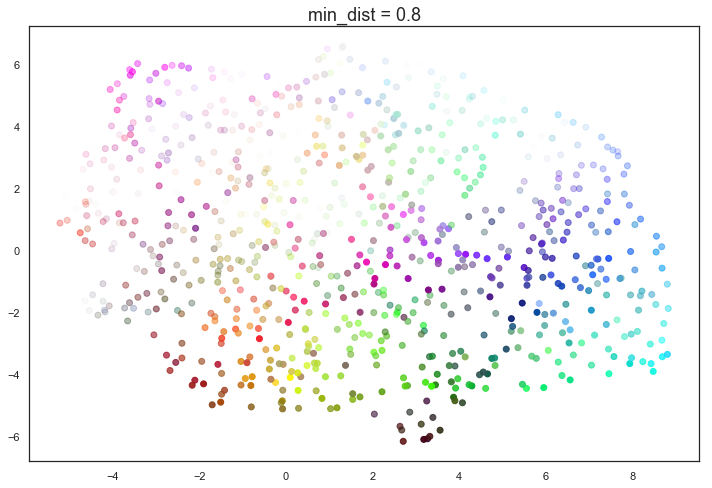

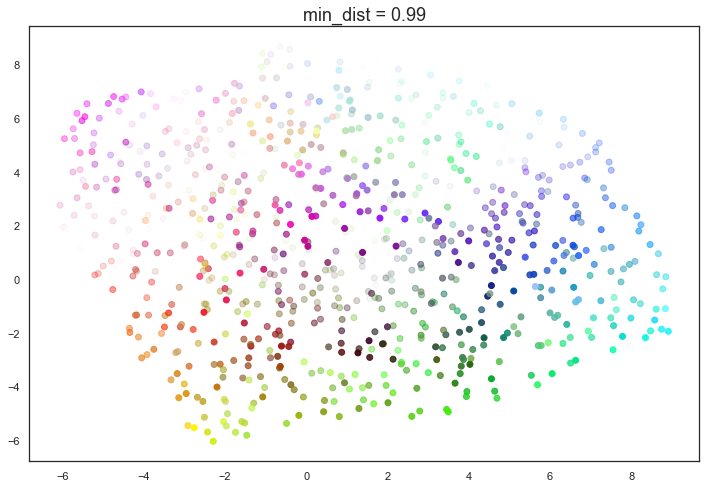

In [74]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))
    
# clumps and strings pushed apart as min_dist is greater 

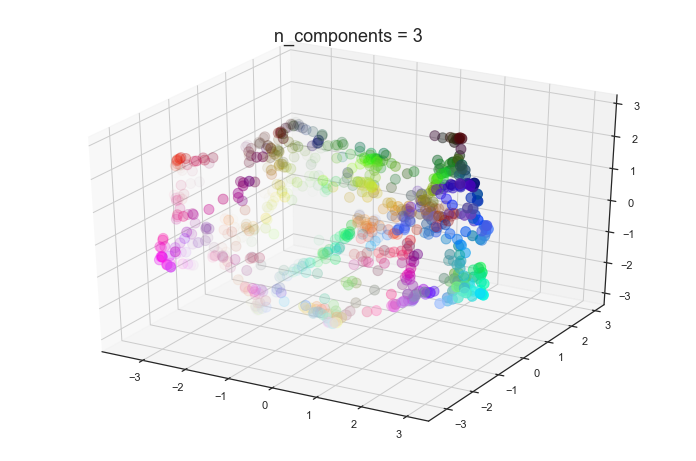

In [75]:
draw_umap(n_components=3, title='n_components = 3')


### Comparison of Dimensionality Techniques 

Taken directly from: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_algorithm_comparison.html#sphx-glr-auto-examples-plot-algorithm-comparison-py

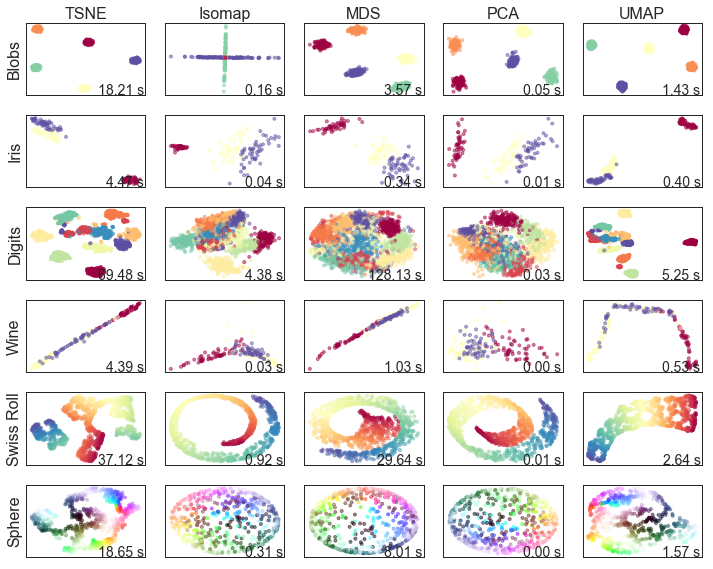

In [30]:


sns.set(context="paper", style="white")

blobs, blob_labels = datasets.make_blobs(
    n_samples=500, n_features=10, centers=5, random_state=42
)
iris = datasets.load_iris()
digits = datasets.load_digits(n_class=10)
wine = datasets.load_wine()
swissroll, swissroll_labels = datasets.make_swiss_roll(
    n_samples=1000, noise=0.1, random_state=42
)
sphere = np.random.normal(size=(600, 3))
sphere = preprocessing.normalize(sphere)
sphere_hsv = np.array(
    [
        (
            (np.arctan2(c[1], c[0]) + np.pi) / (2 * np.pi),
            np.abs(c[2]),
            min((c[2] + 1.1), 1.0),
        )
        for c in sphere
    ]
)
sphere_colors = np.array([hsv_to_rgb(*c) for c in sphere_hsv])

reducers = [
    (manifold.TSNE, {"perplexity": 50}),
    # (manifold.LocallyLinearEmbedding, {'n_neighbors':10, 'method':'hessian'}),
    (manifold.Isomap, {"n_neighbors": 30}),
    (manifold.MDS, {}),
    (decomposition.PCA, {}),
    (umap.UMAP, {"n_neighbors": 30, "min_dist": 0.3}),
]

test_data = [
    (blobs, blob_labels),
    (iris.data, iris.target),
    (digits.data, digits.target),
    (wine.data, wine.target),
    (swissroll, swissroll_labels),
    (sphere, sphere_colors),
]
dataset_names = ["Blobs", "Iris", "Digits", "Wine", "Swiss Roll", "Sphere"]

n_rows = len(test_data)
n_cols = len(reducers)
ax_index = 1
ax_list = []

# plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01
)
for data, labels in test_data:
    for reducer, args in reducers:
        start_time = time.time()
        embedding = reducer(n_components=2, **args).fit_transform(data)
        elapsed_time = time.time() - start_time
        ax = plt.subplot(n_rows, n_cols, ax_index)
        if isinstance(labels[0], tuple):
            ax.scatter(*embedding.T, s=10, c=labels, alpha=0.5)
        else:
            ax.scatter(
                *embedding.T, s=10, c=labels, cmap="Spectral", alpha=0.5
            )
        ax.text(
            0.99,
            0.01,
            "{:.2f} s".format(elapsed_time),
            transform=ax.transAxes,
            size=14,
            horizontalalignment="right",
        )
        ax_list.append(ax)
        ax_index += 1
plt.setp(ax_list, xticks=[], yticks=[])

for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel(dataset_names[i // n_cols], size=16)
for i in range(n_cols):
    ax_list[i].set_xlabel(repr(reducers[i][0]()).split("(")[0], size=16)
    ax_list[i].xaxis.set_label_position("top")

plt.tight_layout()
plt.show()

### UMAP on word embeddings of NIPS abstracts


In [32]:
df_papers = pd.read_csv("./data/nips-papers/papers.csv") # papers
df_papers_clean=pd.ExcelFile("./data/abstract2.xlsx").parse('Sheet1') #cleaned version

#change Nulls to empty strings
df_papers_clean.abstract2 = df_papers_clean.abstract2.fillna('')

#convert to lower case
df_papers_clean.abstract2 = df_papers_clean.abstract2.str.lower()

#join year
df_papers_clean=df_papers_clean.join(df_papers.iloc[:,:2].set_index('id'),on='id')


In [35]:
#Turn text and abstracts into lists, rmv non alphabetic
#also define stop words
abstracts_list = df_papers_clean['abstract2'].tolist()
abstracts_list = [re.sub('[^a-zA-Z]', ' ',a) for a in abstracts_list]

# add to stop words
stops = set(stopwords.words("english")) 
stops = stops.union(['setting','results','using','approach','problems','based','x','xi','yi','ii','x1','x2','y1','y2','xt','yt''fig'])  



In [44]:
# tokenize abstracts
tokenizer = RegexpTokenizer(r'\w+')

def tokenize(raw_text):
    raw = raw_text
    tokens = tokenizer.tokenize(raw)
    # Remove stopwords and words of length<4
    stopped_tokens = [i for i in tokens if not i in stops and len(i) > 3]
    return stopped_tokens

abstract_tokens=[tokenize(i) for i in abstracts_list]


In [39]:
abstract_w2v = word2vec.Word2Vec(abstract_tokens, size=100, window=10, min_count=100, workers=4, seed=82)

In [42]:

tokens = []
labels = []
for word in sorted(abstract_w2v.wv.vocab):
        tokens.append(abstract_w2v.wv[word])
        labels.append(word)
        

In [59]:
umap_nips_reducer = umap.UMAP(metric='cosine')

umap_nips = umap_nips_reducer.fit_transform(tokens)

print(umap_nips.shape)
umap_nips[:5]

(1152, 2)


array([[ 1.4886876 ,  2.3720775 ],
       [ 0.6506124 ,  3.496596  ],
       [-0.05195517,  0.9964709 ],
       [-2.8000128 ,  0.23083588],
       [ 2.776519  ,  0.5102816 ]], dtype=float32)

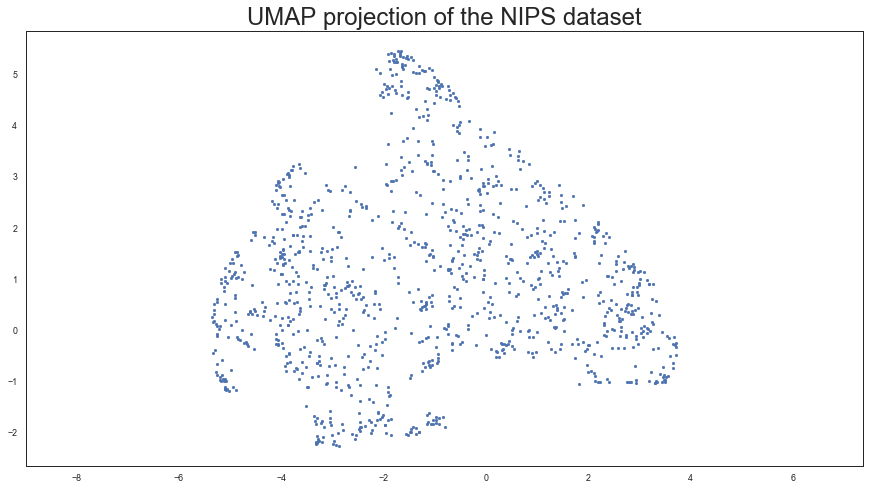

In [65]:
plt.figure(figsize=(15,8))
plt.scatter(umap_nips[:, 0], umap_nips[:, 1],s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the NIPS dataset', fontsize=24);